In [3]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## Collecting the data

In [4]:
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
print(housing_data_plus_bias.shape)

(20640, 9)


In [6]:
housing_data_plus_bias = sklearn.preprocessing.StandardScaler().fit_transform(housing_data_plus_bias)


Configure epochs and mini-batches size

In [8]:
def fetch_batch(batch_index, batch_size, data, data_y):
    X_batch = data[batch_index * batch_size: (batch_index + 1) * batch_size]
    y_batch = data_y.reshape(-1, 1)[batch_index * batch_size: (batch_index + 1) * batch_size]
    return X_batch, y_batch


In [9]:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

We can compute 

In [10]:
# Manual gradients
# gradients = 2 / m * tf.matmul(tf.transpose(X), error)
# Autodiff gradients
# gradients = tf.gradients(mse, [theta])[0]
# training_op = tf.assign(theta, theta - learning_rate * gradients)

Or we can let Tensroflow Optimizer let do this for us

In [11]:

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [23]:
init = tf.global_variables_initializer()


In [70]:
n_epochs = 1000
learning_rate = 0.01
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [71]:
saver = tf.train.Saver()

In [72]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter('logs', tf.get_default_graph())

Epoch 0 MSE 4.812774181365967


Epoch 100 MSE 4.812774181365967


Epoch 200 MSE 4.812774181365967


Epoch 300 MSE 4.812774181365967


Epoch 400 MSE 4.812774181365967


Epoch 500 MSE 4.812774181365967


Epoch 600 MSE 4.812774181365967


Epoch 700 MSE 4.812774181365967


Epoch 800 MSE 4.812774181365967


Epoch 900 MSE 4.812774181365967


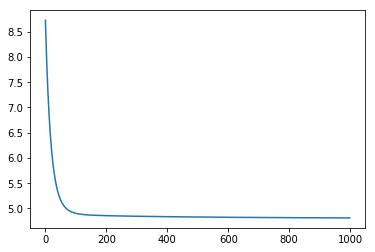

In [73]:
#MSE_VALUES = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch in range(n_batches):
            X_batch, y_batch = fetch_batch(batch, batch_size, housing_data_plus_bias, housing.target)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            if batch % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                file_writer.add_summary(summary_str, epoch * n_batches + batch)
        #mse_ev = mse.eval(feed_dict={X: X_batch, y: y_batch})
        #MSE_VALUES.append(mse_ev)
        if epoch % 100 == 0:
            print("Epoch {} MSE {}".format(epoch, mse_ev))
    
    best_theta = theta.eval()
    save_path = saver.save(sess, 'saved_models/my_model_final.ckpt')
    
# plt.plot(MSE_VALUES)
# plt.show()
file_writer.close()